Import dataset from keras dataset imdb.

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 3s 0us/step


Viewing the data. The  data is already encoded as integers.

In [14]:
print("first_train_data:", train_data[0])
print("first_train_label:", train_labels[0])

first_train_data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
first_train_label: 1


Only 10000 words are taken so the manximum value of train_data is 9999.

In [19]:
max([max(sequence) for sequence in train_data])

9999

Decode reviews back to text. Display the original text of train_data[0]

In [26]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Encoding the integer sequence via multi-hot encoding

In [37]:
import numpy as np

def vectorized_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
            
    return results

x_train = vectorized_sequences(train_data)
x_test = vectorized_sequences(test_data)
        

In [38]:
x_train.shape

(25000, 10000)

Vectorizing labels, converting them to float32

In [39]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [46]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Now the data is ready to fed into a neural network, Building the model

In [52]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])

Setting up validation set

In [53]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [54]:
x_val.shape

(10000, 10000)

Traning Model

In [56]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-04-23 19:35:44.909975: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


25/30 [========================>.....] - ETA: 0s - loss: 0.5951 - accuracy: 0.6974

2022-04-23 19:35:46.820019: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 52ms/step - loss: 0.5808 - accuracy: 0.7185 - val_loss: 0.4954 - val_accuracy: 0.8606
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3971 - accuracy: 0.8875 - val_loss: 0.3611 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2761 - accuracy: 0.9183 - val_loss: 0.3119 - val_accuracy: 0.8811
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2085 - accuracy: 0.9351 - val_loss: 0.2904 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1651 - accuracy: 0.9512 - val_loss: 0.3069 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1372 - accuracy: 0.9587 - val_loss: 0.2979 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1107 - accuracy: 0.9678 - val_loss: 0.3016 - val_accuracy: 0.8818
Epoch 8/20
30/30 [======

Looking back to the history ;)

In [59]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

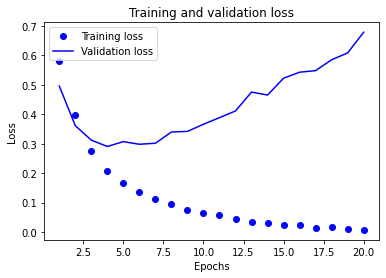

In [64]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")   
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

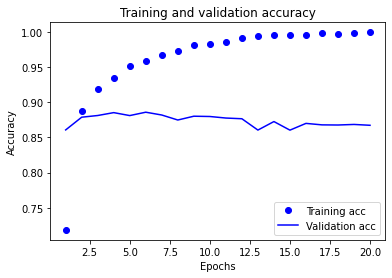

In [65]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Train new model from scratch for four epochs (after fourth epoch the model began to overfit) and then evaluate it on the test data as validation loss began to increase from fourth epoch

In [66]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [67]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4


2022-04-23 19:43:27.516794: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


49/49 [==============================] - 1s 13ms/step - loss: 0.4744 - accuracy: 0.8252
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2700 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2060 - accuracy: 0.9264
Epoch 4/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1733 - accuracy: 0.9389


In [68]:
results = model.evaluate(x_test, y_test)

Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)